In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
data0 = pd.read_csv('./nhanes_2015_2016.csv')

In [4]:
data0.describe().T

count          mean           std       min        25%       50%  \
SEQN      5735.0  88678.583435   2882.139237  83732.00  86164.000  88668.00   
ALQ101    5208.0      1.336406      0.505514      1.00      1.000      1.00   
ALQ110    1731.0      1.587522      0.623940      1.00      1.000      2.00   
ALQ130    3379.0      3.911512     34.341839      1.00      1.000      2.00   
SMQ020    5735.0      1.607149      0.571975      1.00      1.000      2.00   
RIAGENDR  5735.0      1.518919      0.499686      1.00      1.000      2.00   
RIDAGEYR  5735.0     48.052310     18.431011     18.00     32.000     48.00   
RIDRETH1  5735.0      3.042371      1.296793      1.00      2.000      3.00   
DMDCITZN  5734.0      1.185385      0.491678      1.00      1.000      1.00   
DMDEDUC2  5474.0      3.441725      1.309700      1.00      3.000      4.00   
DMDMARTL  5474.0      2.628608      2.366786      1.00      1.000      1.00   
DMDHHSIZ  5735.0      3.323801      1.724670      1.00      2.000      3.00   
WTINT2YR  5735.0  40312.412352  38768.921774   5330.96  17164.085  24654.86   
SDMVPSU   5735.0      1.487881      0.499897      1.00      1.000      1.00   
SDMVSTRA  5735.0    126.236617      4.244406    119.00    123.000    126.00   
INDFMPIR  5134.0      2.403204      1.601995      0.00      1.060      1.98   
BPXSY1    5401.0    125.084614     18.480873     82.00    112.000    122.00   
BPXDI1    5401.0     69.516386     12.881575      0.00     62.000     70.00   
BPXSY2    5535.0    124.783017     18.527012     84.00    112.000    122.00   
BPXDI2    5535.0     69.346703     13.022829      0.00     62.000     70.00   
BMXWT     5666.0     81.342676     21.764409     32.40     65.900     78.20   
BMXHT     5673.0    166.142834     10.079264    129.70    158.700    166.00   
BMXBMI    5662.0     29.382197      7.095921     14.50     24.300     28.30   
BMXLEG    5345.0     38.576782      3.873018     26.00     36.000     38.60   
BMXARML   5427.0     37.146987      2.800784     28.20     35.200     37.10   
BMXARMC   5427.0     33.112235      5.268027     17.10     29.500     32.70   
BMXWAIST  5368.0     99.567213     16.844109     58.70     87.600     98.30   
HIQ210    4732.0      1.915469      0.414845      1.00      2.000      2.00   

                75%        max  
SEQN      91178.500   93702.00  
ALQ101        2.000       9.00  
ALQ110        2.000       9.00  
ALQ130        3.000     999.00  
SMQ020        2.000       9.00  
RIAGENDR      2.000       2.00  
RIDAGEYR     63.000      80.00  
RIDRETH1      4.000       5.00  
DMDCITZN      1.000       9.00  
DMDEDUC2      4.750       9.00  
DMDMARTL      5.000      77.00  
DMDHHSIZ      5.000       7.00  
WTINT2YR  42862.305  233755.84  
SDMVPSU       2.000       2.00  
SDMVSTRA    130.000     133.00  
INDFMPIR      3.740       5.00  
BPXSY1      134.000     236.00  
BPXDI1       78.000     120.00  
BPXSY2      134.000     238.00  
BPXDI2       78.000     144.00  
BMXWT        92.700     198.90  
BMXHT       173.500     202.70  
BMXBMI       33.000      67.30  
BMXLEG       41.200      51.50  
BMXARML      39.000      47.40  
BMXARMC      36.200      58.40  
BMXWAIST    109.300     171.60  
HIQ210        2.000       9.00

In [4]:
# check for balanced dataset
# plot output BMXBMI
# features are all other variables

# replace null values of ALQ101, ALQ110, ALQ130, HIQ210  with 1, lowest value in these variables
# remove all other null value rows, since they are only few hundreds which are null and dataset is large

In [5]:
# remove null values
data0.isnull().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2     261
DMDMARTL     261
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [6]:
data0[['ALQ101', 'ALQ110', 'ALQ130', 'HIQ210']] = data0[['ALQ101', 'ALQ110', 'ALQ130', 'HIQ210']].fillna(1)

In [7]:
data0.isnull().sum()

SEQN          0
ALQ101        0
ALQ110        0
ALQ130        0
SMQ020        0
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDCITZN      1
DMDEDUC2    261
DMDMARTL    261
DMDHHSIZ      0
WTINT2YR      0
SDMVPSU       0
SDMVSTRA      0
INDFMPIR    601
BPXSY1      334
BPXDI1      334
BPXSY2      200
BPXDI2      200
BMXWT        69
BMXHT        62
BMXBMI       73
BMXLEG      390
BMXARML     308
BMXARMC     308
BMXWAIST    367
HIQ210        0
dtype: int64

In [9]:
data0 = data0.dropna(axis=0)

In [10]:
data0.isnull().sum()

SEQN        0
ALQ101      0
ALQ110      0
ALQ130      0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64

In [11]:
# BMXBMI Body Mass Index (kg/m**2) is used as target
# Features for first regression
# except SEQN (sequence number) all other variables are in this regression
'''
SEQN          
ALQ101        
ALQ110        
ALQ130        
SMQ020        
RIAGENDR      
RIDAGEYR      
RIDRETH1      
DMDCITZN      
DMDEDUC2    
DMDMARTL    
DMDHHSIZ    
WTINT2YR    
SDMVPSU     
SDMVSTRA    
INDFMPIR    
BPXSY1      
BPXDI1      
BPXSY2      
BPXDI2      
BMXWT       
BMXHT       
BMXBMI      
BMXLEG      
BMXARML     
BMXARMC     
BMXWAIST    
HIQ210      
'''

'\nSEQN          \nALQ101        \nALQ110        \nALQ130        \nSMQ020        \nRIAGENDR      \nRIDAGEYR      \nRIDRETH1      \nDMDCITZN      \nDMDEDUC2    \nDMDMARTL    \nDMDHHSIZ    \nWTINT2YR    \nSDMVPSU     \nSDMVSTRA    \nINDFMPIR    \nBPXSY1      \nBPXDI1      \nBPXSY2      \nBPXDI2      \nBMXWT       \nBMXHT       \nBMXBMI      \nBMXLEG      \nBMXARML     \nBMXARMC     \nBMXWAIST    \nHIQ210      \n'

In [12]:
data1 = data0.drop(['SEQN'], axis=1)

In [13]:
data1.describe()

ALQ101       ALQ110       ALQ130       SMQ020     RIAGENDR  \
count  4308.000000  4308.000000  4308.000000  4308.000000  4308.000000   
mean      1.282498     1.152971     2.802228     1.580084     1.512071   
std       0.478272     0.394468    26.379865     0.531648     0.499912   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     2.000000     2.000000   
75%       2.000000     1.000000     2.000000     2.000000     2.000000   
max       9.000000     9.000000   999.000000     9.000000     2.000000   

         RIDAGEYR     RIDRETH1     DMDCITZN     DMDEDUC2     DMDMARTL  ...  \
count  4308.00000  4308.000000  4308.000000  4308.000000  4308.000000  ...   
mean     48.57312     3.020195     1.175487     3.481662     2.597957  ...   
std      17.31717     1.272053     0.452358     1.281719     1.906672  ...   
min      20.00000     1.000000     1.000000     1.000000     1.000000  ...   
25%      34.00000     2.000000     1.000000     3.000000     1.000000  ...   
50%      48.00000     3.000000     1.000000     4.000000     1.000000  ...   
75%      62.00000     4.000000     1.000000     5.000000     5.000000  ...   
max      80.00000     5.000000     9.000000     9.000000     6.000000  ...   

            BPXSY2       BPXDI2        BMXWT        BMXHT       BMXBMI  \
count  4308.000000  4308.000000  4308.000000  4308.000000  4308.000000   
mean    124.305942    69.623491    81.581453   166.447516    29.348375   
std      17.805862    12.415241    21.113559    10.019950     6.750635   
min      84.000000     0.000000    32.400000   129.700000    14.500000   
25%     112.000000    62.000000    66.800000   159.100000    24.500000   
50%     122.000000    70.000000    78.600000   166.400000    28.400000   
75%     134.000000    78.000000    92.925000   173.800000    33.000000   
max     238.000000   114.000000   198.900000   202.700000    62.700000   

            BMXLEG      BMXARML      BMXARMC     BMXWAIST       HIQ210  
count  4308.000000  4308.000000  4308.000000  4308.000000  4308.000000  
mean     38.546007    37.187651    33.157382   100.017224     1.745590  
std       3.879528     2.806379     5.095596    16.345862     0.464472  
min      26.000000    28.200000    17.100000    58.700000     1.000000  
25%      36.000000    35.200000    29.700000    88.500000     1.000000  
50%      38.500000    37.200000    32.800000    98.800000     2.000000  
75%      41.200000    39.000000    36.200000   109.700000     2.000000  
max      51.100000    47.400000    54.400000   165.000000     9.000000  

[8 rows x 27 columns]

In [15]:
#sns.pairplot(data_BodyMassIndex)

<AxesSubplot:>

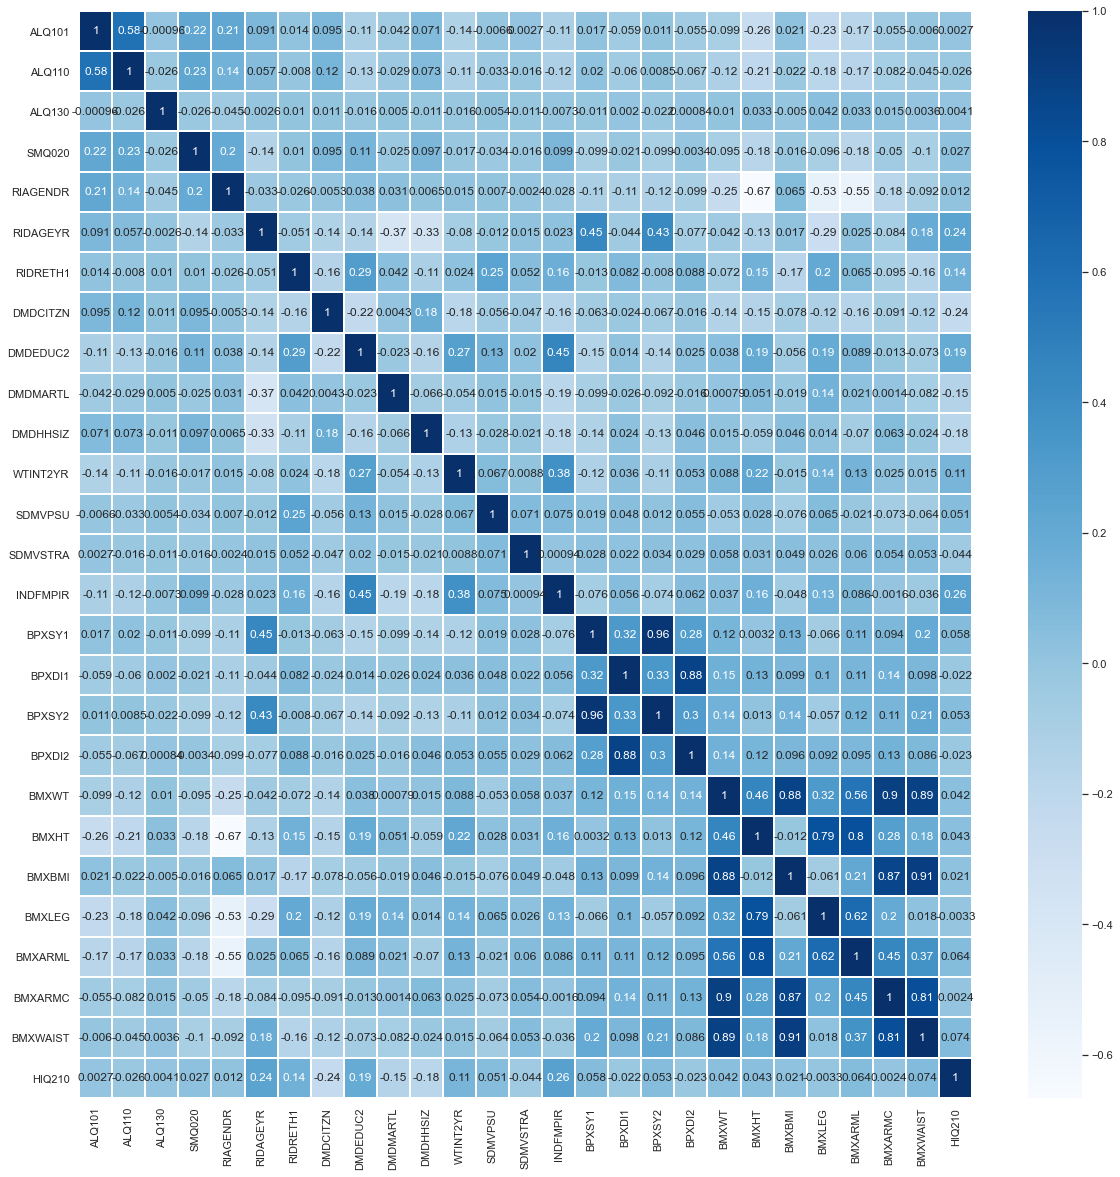

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), linewidths=0.2, annot=True, cmap='Blues')

In [17]:
(data1.corr()).describe()


ALQ101     ALQ110     ALQ130     SMQ020   RIAGENDR   RIDAGEYR  \
count  27.000000  27.000000  27.000000  27.000000  27.000000  27.000000   
mean    0.037042   0.028382   0.036052   0.032708  -0.041878   0.020377   
std     0.250316   0.247793   0.193575   0.222409   0.294504   0.271087   
min    -0.256621  -0.213833  -0.044556  -0.176813  -0.665797  -0.374198   
25%    -0.078887  -0.098131  -0.011418  -0.095310  -0.111293  -0.105606   
50%    -0.000963  -0.026499   0.000840  -0.016556  -0.026124  -0.033452   
75%     0.045676   0.038531   0.010350   0.096010   0.022828   0.041227   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        RIDRETH1   DMDCITZN   DMDEDUC2   DMDMARTL  ...     BPXSY2     BPXDI2  \
count  27.000000  27.000000  27.000000  27.000000  ...  27.000000  27.000000   
mean    0.063504  -0.027506   0.067174   0.000325  ...   0.108948   0.119682   
std     0.221666   0.230378   0.245517   0.220257  ...   0.290231   0.254815   
min    -0.165922  -0.239427  -0.224308  -0.374198  ...  -0.142376  -0.099337   
25%    -0.038463  -0.146622  -0.090988  -0.060011  ...  -0.070722  -0.009715   
50%     0.013900  -0.067432   0.020105  -0.018654  ...   0.012246   0.055227   
75%     0.116217  -0.000485   0.156705   0.010139  ...   0.137627   0.108387   
max     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   

           BMXWT      BMXHT     BMXBMI     BMXLEG    BMXARML    BMXARMC  \
count  27.000000  27.000000  27.000000  27.000000  27.000000  27.000000   
mean    0.184033   0.110829   0.147167   0.091265   0.136380   0.163663   
std     0.356163   0.341808   0.335440   0.314548   0.324398   0.337182   
min    -0.254784  -0.665797  -0.165922  -0.532077  -0.553144  -0.180485   
25%    -0.047449  -0.035291  -0.020469  -0.063107  -0.000274  -0.052227   
50%     0.041950   0.043008   0.020662   0.041541   0.085820   0.025112   
75%     0.234037   0.181532   0.112889   0.166265   0.168388   0.168188   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        BMXWAIST     HIQ210  
count  27.000000  27.000000  
mean    0.158654   0.063384  
std     0.338549   0.217372  
min    -0.158761  -0.239427  
25%    -0.054498  -0.012855  
50%     0.018296   0.027052  
75%     0.190318   0.068651  
max     1.000000   1.000000  

[8 rows x 27 columns]

In [18]:
# correlation among BMXBMI, BMXLEG, BMXARML, BMXARMC, BMXWAIST are high
# with this regression all variables are used

In [19]:
data1.columns

Index(['ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [20]:
# we will see relation between continuous variables

In [21]:
data_sub0 = data1[['SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']]

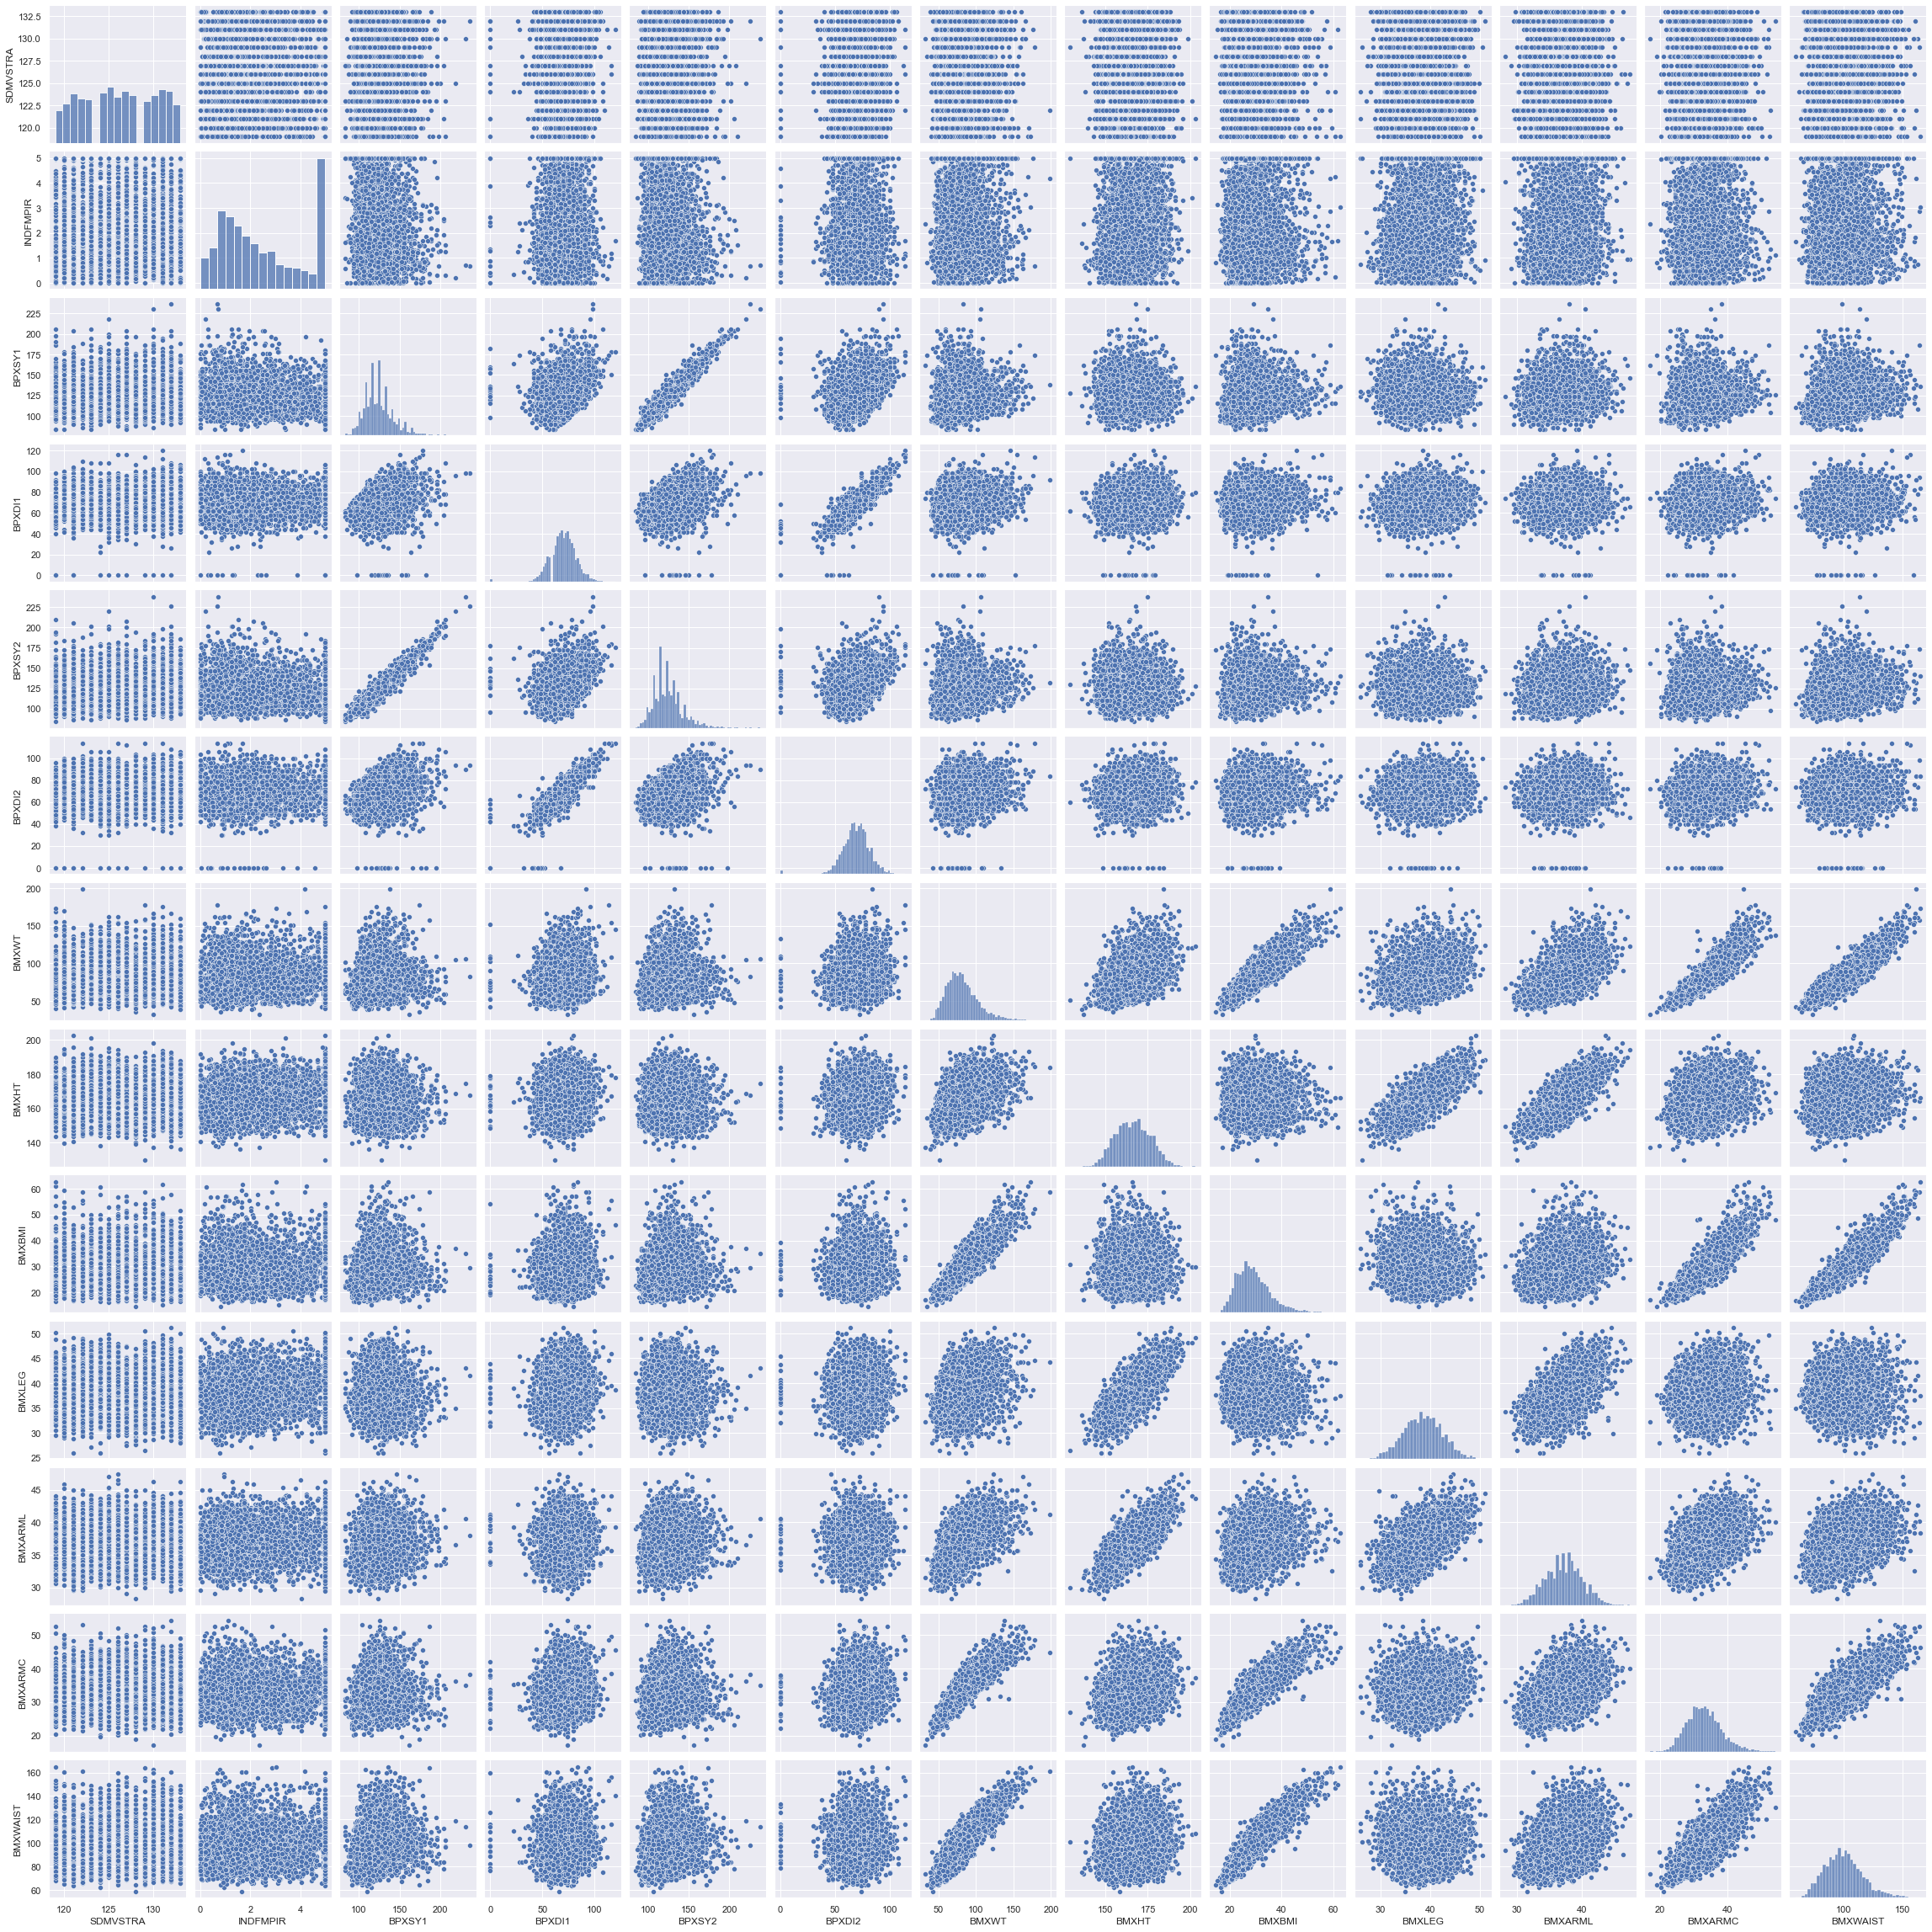

In [22]:
sns.pairplot(data_sub0, diag_kind='hist')

In [23]:
# there are categorical variables
# and some are linearly related
# may are not linearly related

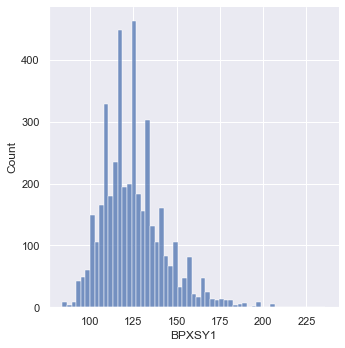

In [24]:
# Check distribution of first continuous variable
sns.displot(data_sub0['BPXSY1'])

In [25]:
# all the continuous variables are normally distributed (assumptio 3)
# when we scale the data, the mean would become 0

In [26]:
# check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data1[['SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [27]:
vif

VIF  Features
0    799.368669  SDMVSTRA
1      3.495870  INDFMPIR
2    638.683628    BPXSY1
3    150.586917    BPXDI1
4    656.898926    BPXSY2
5    145.047203    BPXDI2
6    287.496530     BMXWT
7   1620.074968     BMXHT
8    431.028569    BMXBMI
9    298.076883    BMXLEG
10   608.876626   BMXARML
11   299.621430   BMXARMC
12   357.732167  BMXWAIST

In [28]:
# vif values of all variables are very high
# anything more than 5 indicates high multicollinearity
# we have to drop those variables ideally
# but we will keep them for first regression test
# except INDFMPIR all other variables are having high vif
# we will not drop for this regression

In [29]:
x1 = data1.drop(['BMXBMI'], axis=1)
y = data1['BMXBMI']

In [38]:
# split data int train and test with 80/20 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, shuffle=True, random_state=33)

In [39]:
x_train.shape, x_test.shape

((3446, 26), (862, 26))

In [40]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [41]:
x_train_scaled

array([[ 1.47500271,  2.11242161, -0.06681888, ..., -0.13934571,
         0.55807802,  0.56075395],
       [-0.5845027 , -0.37796664, -0.06681888, ...,  0.33119354,
         0.90251898,  0.56075395],
       [-0.5845027 , -0.37796664, -0.06681888, ...,  0.44882836,
         0.15828049, -1.64261905],
       ...,
       [-0.5845027 , -0.37796664, -0.06681888, ...,  1.56635908,
         0.39815901,  0.56075395],
       [ 1.47500271,  2.11242161, -0.06681888, ..., -0.76673137,
         0.01681366,  0.56075395],
       [-0.5845027 , -0.37796664, -0.06681888, ..., -0.0805283 ,
        -0.45064192,  0.56075395]])

In [43]:
scaler2 = StandardScaler()
scaler2.fit(x_test)
x_test_scaled = scaler2.transform(x_test)

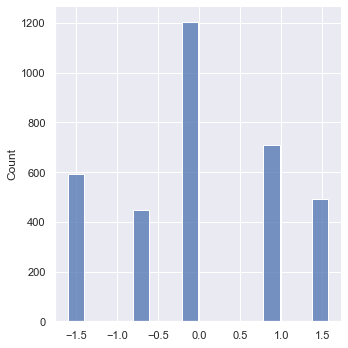

In [44]:
sns.displot(x_train_scaled[:,6])

In [46]:
# Do Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [48]:
r_squared = reg.score(x_train_scaled, y_train)

In [49]:
coefs = reg.coef_
bias = reg.intercept_

In [50]:
r_squared

0.9865464930604022

In [51]:
coefs

array([-5.41806141e-03, -2.99747261e-02, -7.35313340e-04, -2.96808516e-03,
        6.80585492e-02, -2.44001588e-02, -6.87725229e-02, -2.28938894e-02,
        4.89282161e-02,  4.19082896e-02, -1.85049705e-02, -8.80606785e-03,
        6.11975138e-03,  4.60766547e-03, -2.66084838e-02, -5.08377717e-02,
       -1.96813896e-02,  2.22728465e-02,  2.80112373e-02,  6.58277309e+00,
       -3.26924914e+00, -2.80752535e-02, -4.78516822e-03,  5.15753448e-01,
        3.95028202e-01, -3.26833674e-02])

In [52]:
bias

29.304585026117238

In [53]:
y_train_hat = reg.predict(x_train_scaled)

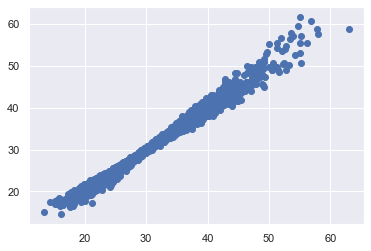

In [56]:
plt.scatter(y_train_hat, y_train)
plt.show()

In [57]:
# regression model has done a good job and the y_train_hat vs y_train is almost a straight line

In [58]:
# We will test our model
y_test_hat = reg.predict(x_test_scaled)

C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMXBMI'>

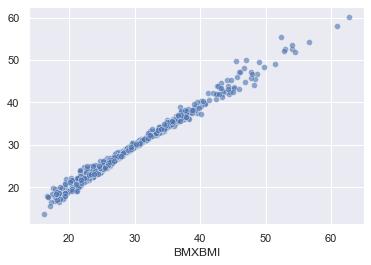

In [61]:
sns.scatterplot(y_test, y_test_hat, alpha=0.6, palette='deep')

In [62]:
# success, the predictions of the data based on our model is almost linear
# this indicates that the model is good

In [38]:
# test predictions

In [63]:
targets_predictions = pd.DataFrame()

In [64]:
targets_predictions['Targets'] = y_test
targets_predictions['Predictions'] = y_test_hat

In [65]:
targets_predictions['Difference'] = targets_predictions['Targets'] - targets_predictions['Predictions']


In [66]:
targets_predictions['Difference %'] = (100 * targets_predictions['Difference']/targets_predictions['Targets']).round(2)

In [67]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [68]:
targets_predictions.sort_values(by='Difference %')

Targets  Predictions  Difference  Difference %
3759    19.50        21.97       -2.47        -12.68
2943    17.60        19.80       -2.20        -12.50
3775    22.30        24.74       -2.44        -10.96
3444    21.70        24.04       -2.34        -10.77
3501    21.60        23.92       -2.32        -10.74
1056    45.50        49.87       -4.37         -9.61
5192    22.80        24.98       -2.18         -9.57
4367    20.30        22.14       -1.84         -9.04
4055    17.90        19.49       -1.59         -8.89
692     21.60        23.50       -1.90         -8.80
3859    20.10        21.81       -1.71         -8.51
2103    19.30        20.93       -1.63         -8.44
1810    16.60        17.98       -1.38         -8.31
5088    22.50        24.35       -1.85         -8.21
1950    18.60        20.13       -1.53         -8.20
2849    22.80        24.47       -1.67         -7.32
716     23.30        24.95       -1.65         -7.10
2542    19.40        20.72       -1.32         -6.79
2703    22.60        24.13       -1.53         -6.75
5450    20.40        21.73       -1.33         -6.53
235     20.30        21.60       -1.30         -6.40
2231    24.70        26.27       -1.57         -6.37
5016    17.90        19.02       -1.12         -6.26
5134    47.00        49.94       -2.94         -6.25
1615    23.20        24.61       -1.41         -6.09
3583    20.10        21.31       -1.21         -6.01
536     16.70        17.70       -1.00         -6.01
5590    52.30        55.38       -3.08         -5.89
4037    16.70        17.68       -0.98         -5.85
4295    23.60        24.98       -1.38         -5.84
3355    19.90        21.04       -1.14         -5.71
1146    17.40        18.37       -0.97         -5.55
4547    23.40        24.69       -1.29         -5.51
2890    23.60        24.85       -1.25         -5.31
4886    18.00        18.96       -0.96         -5.31
2067    37.00        38.84       -1.84         -4.96
5146    22.90        24.03       -1.13         -4.95
4578    22.50        23.61       -1.11         -4.91
2544    20.20        21.17       -0.97         -4.82
4929    24.00        25.15       -1.15         -4.81
749     21.70        22.72       -1.02         -4.71
4676    22.50        23.55       -1.05         -4.66
2898    22.70        23.75       -1.05         -4.64
5678    18.90        19.78       -0.88         -4.64
719     22.10        23.11       -1.01         -4.55
1596    21.20        22.14       -0.94         -4.46
3189    23.40        24.42       -1.02         -4.36
2084    22.90        23.88       -0.98         -4.27
23      22.80        23.77       -0.97         -4.24
2714    21.70        22.61       -0.91         -4.21
3343    25.80        26.85       -1.05         -4.05
2446    18.50        19.24       -0.74         -4.01
3922    23.80        24.74       -0.94         -3.95
3357    18.10        18.81       -0.71         -3.94
5509    25.10        26.08       -0.98         -3.91
1905    23.90        24.81       -0.91         -3.80
2628    21.50        22.29       -0.79         -3.66
114     23.40        24.26       -0.86         -3.66
1122    22.50        23.31       -0.81         -3.58
1037    25.40        26.31       -0.91         -3.57
5145    27.10        28.06       -0.96         -3.55
873     20.80        21.54       -0.74         -3.55
5316    21.40        22.13       -0.73         -3.40
152     43.20        44.67       -1.47         -3.39
3628    18.10        18.71       -0.61         -3.38
2218    32.60        33.70       -1.10         -3.37
1469    22.50        23.25       -0.75         -3.35
5636    21.40        22.10       -0.70         -3.28
1089    19.40        20.04       -0.64         -3.28
2547    46.70        48.21       -1.51         -3.24
5621    25.40        26.22       -0.82         -3.24
2512    20.90        21.56       -0.66         -3.15
3217    42.60        43.90       -1.30         -3.05
2663    21.80        22.46       -0.66         -3.02
5457    27.20        28.01     

C:\Users\bha38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Difference %', ylabel='Density'>

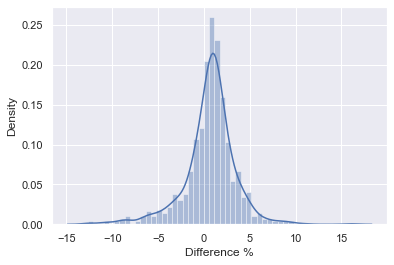

In [69]:
sns.distplot(targets_predictions['Difference %'])

In [70]:
# regression for target 'BMXBMI', with with all other variables except SEQN is good
# the model is able to predict and the difference varies from -10% to 10% having 0 mean
# our test data which was never seen by the model during training
# is predicted within a max difference of 10% on either side
# the model is good
# as there is no overfitting with our train_test_split